Credit card detection for Fraud 

Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from imblearn.over_sampling import SMOTE
import joblib


In [7]:
data = pd.read_csv("../Datasets/creditcard.csv")
display(data.head())
display(data.tail())


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
sc = StandardScaler()
data["Amount"] = sc.fit_transform(pd.DataFrame(data["Amount"]))
data.shape


(284807, 31)

In [ ]:
dataframe = data.drop_duplicates()
print(data.shape)
plt.style.use("ggplot")


(284807, 31)


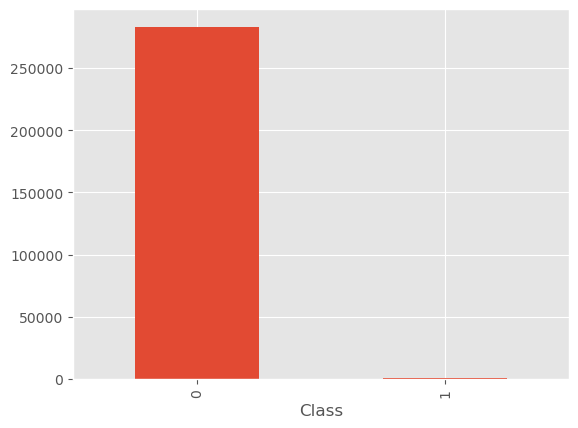

In [ ]:
# sns.countplot(data=dataframe["Class"]) WAY too slow to create
dataframe["Class"].value_counts().plot.bar()

plt.show()


In [ ]:
X = data.drop("Class",axis = 1)
y = data["Class"]


In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)


In [13]:
classifier = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n======{name}========")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy: {accuracy_score(y_test,y_pred)}")
    print(f"\n Precision: {precision_score(y_test,y_pred)}")
    print(f"\n Recall: {recall_score(y_test,y_pred)}")
    print(f"\n F1: {f1_score(y_test,y_pred)}")



======Logistic Regression========


/home/jamiroscreti/anaconda3/envs/Portfolio/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Accuracy: 0.9989115550718023

 Precision: 0.7045454545454546

 Recall: 0.6326530612244898

 F1: 0.6666666666666666

======Decision Tree Classifier========

 Accuracy: 0.9991222218320986

 Precision: 0.7222222222222222

 Recall: 0.7959183673469388

 F1: 0.7572815533980582


Undersampling dataset cause too large and REALLY skewed towards 1 class

In [ ]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]
normal.shape
fraud.shape


(492, 31)

In [ ]:
normal_sample = normal.sample(n=492) # cause 492 items are a fraud
normal_sample.shape


(4, 31)

In [ ]:
new_data = pd.concat([normal_sample,fraud],ignore_index=True)
new_data.head()
new_data['Class'].value_counts()


Class
1    492
0      4
Name: count, dtype: int64

In [ ]:
X = new_data.drop("Class",axis = 1)
y = new_data["Class"]
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)


In [18]:
classifier = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n======{name}========")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy: {accuracy_score(y_test,y_pred)}")
    print(f"\n Precision: {precision_score(y_test,y_pred)}")
    print(f"\n Recall: {recall_score(y_test,y_pred)}")
    print(f"\n F1: {f1_score(y_test,y_pred)}")



======Logistic Regression========

 Accuracy: 0.97

 Precision: 0.9797979797979798

 Recall: 0.9897959183673469

 F1: 0.9847715736040609

======Decision Tree Classifier========

 Accuracy: 0.98

 Precision: 0.98

 Recall: 1.0

 F1: 0.98989898989899


/home/jamiroscreti/anaconda3/envs/Portfolio/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Oversampling

In [ ]:
X = data.drop("Class",axis = 1)
y = data["Class"]


In [ ]:
X_res, y_res = SMOTE().fit_resample(X, y)
y_res.value_counts()


Class
0    284315
1    284315
Name: count, dtype: int64

In [ ]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
classifier = {
    "Logistic Regression" : LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

for name, clf in classifier.items():
    print(f"\n======{name}========")
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(f"\n Accuracy: {accuracy_score(y_test,y_pred)}")
    print(f"\n Precision: {precision_score(y_test,y_pred)}")
    print(f"\n Recall: {recall_score(y_test,y_pred)}")
    print(f"\n F1: {f1_score(y_test,y_pred)}")



======Logistic Regression========


/home/jamiroscreti/anaconda3/envs/Portfolio/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



 Accuracy: 0.9989115550718023

 Precision: 0.7045454545454546

 Recall: 0.6326530612244898

 F1: 0.6666666666666666

======Decision Tree Classifier========

 Accuracy: 0.9991046662687406

 Precision: 0.7155963302752294

 Recall: 0.7959183673469388

 F1: 0.7536231884057971


Decision tree classifier

In [ ]:


# create a decision tree classifier object
dtc = DecisionTreeClassifier()

# fit the model on the training data
dtc.fit(X_train, y_train)

# make predictions on the testing data
y_pred = dtc.predict(X_test)


In [ ]:
joblib.dump(dtc,"credit_card_fraud_detection.pkl")


['credit_card_fraud_detection.pkl']

In [25]:
model = joblib.load("credit_card_fraud_detection.pkl")


In [ ]:
# i use first line of the csv as an example
pred = model.predict([[0,-1.3598071336738,-0.0727811733098497,2.53634673796914,1.37815522427443,-0.338320769942518,0.462387777762292,0.239598554061257,0.0986979012610507,0.363786969611213,0.0907941719789316,-0.551599533260813,-0.617800855762348,-0.991389847235408,-0.311169353699879,1.46817697209427,-0.470400525259478,0.207971241929242,0.0257905801985591,0.403992960255733,0.251412098239705,-0.018306777944153,0.277837575558899,-0.110473910188767,0.0669280749146731,0.128539358273528,-0.189114843888824,0.133558376740387,-0.0210530534538215,149.62]])


/home/jamiroscreti/anaconda3/envs/Portfolio/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
if pred == 1:
    print("Fraud")
else:
    print("Not Fraud")


Not Fraud
